<a href="https://colab.research.google.com/github/irshad9873/sales_new_rossmann1/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

**Rossmann Stores Data.csv** - historical data including Sales
**store.csv** - supplemental information about the stores

**Data fields**
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
[ ]


In [ ]:
df_data=pd.read_csv("/content/Rossmann Stores Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store1=pd.read_csv("/content/store.csv")

In [ ]:
store1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
df_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store1['CompetitionDistance']=store1['CompetitionDistance'].fillna(store1['CompetitionDistance'].mean())
store1['CompetitionOpenSinceMonth']=store1['CompetitionOpenSinceMonth'].fillna(store1['CompetitionOpenSinceMonth'].mean())
store1['CompetitionOpenSinceYear']=store1['CompetitionOpenSinceYear'].fillna(store1['CompetitionOpenSinceYear'].mean())

In [ ]:
store1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,12.083408,2011.763573
std,322.01708,7652.849306,2.653302,5.117695,0.500078,15.542241,1.198099
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,2009.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,2011.763573
50%,558.00000,2330.000000,7.224704,2008.668857,1.000000,1.000000,2011.763573
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:

store1.update(store1['Promo2SinceYear'].fillna(value=0,inplace=True))
store1.update(store1['PromoInterval'].fillna(value=0,inplace=True))
store1.update(store1['Promo2SinceWeek'].fillna(value=0,inplace=True))


In [ ]:
store1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,2011.763573,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,2011.763573,0


In [ ]:
df_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
new_data=pd.merge(store1,df_data,on='Store')

In [ ]:
new_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0,5,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0,4,5020,546,1,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0,3,4782,523,1,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0,2,5011,560,1,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.763573,0,1,6102,612,1,1,0,1,2015,7,27


In [ ]:

new_data['year'] = pd.DatetimeIndex(new_data['Date']).year

new_data['month'] = pd.DatetimeIndex(new_data['Date']).month

new_data['day'] = pd.DatetimeIndex(new_data['Date']).day




In [ ]:
new_data=new_data.drop(['Date'],axis=1)

In [ ]:
new_data['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
new_data=pd.get_dummies(new_data, columns = ['DayOfWeek'])

In [ ]:
new_data.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales,Customers,...,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,1270.0,9.0,2008.0,0,0.0,2011.763573,0,5263,555,...,1,0,0,0,0,0,0,1,0,0
1,1,1270.0,9.0,2008.0,0,0.0,2011.763573,0,5020,546,...,1,0,0,0,0,0,1,0,0,0
2,1,1270.0,9.0,2008.0,0,0.0,2011.763573,0,4782,523,...,1,0,0,0,0,1,0,0,0,0
3,1,1270.0,9.0,2008.0,0,0.0,2011.763573,0,5011,560,...,1,0,0,0,1,0,0,0,0,0
4,1,1270.0,9.0,2008.0,0,0.0,2011.763573,0,6102,612,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
new_data['Store'].unique()


array([   1,    2,    3, ..., 1113, 1114, 1115])

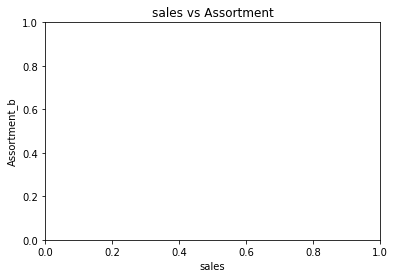

In [ ]:
plt.xlabel("sales")
plt.ylabel('Assortment_b')
plt.title("sales vs Assortment")
plt.show()

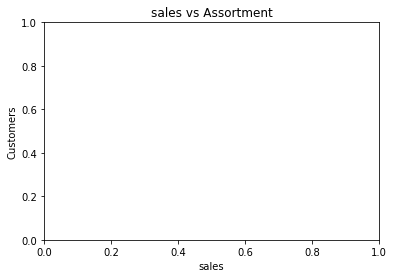

In [ ]:
plt.xlabel("sales")
plt.ylabel('Customers')
plt.title("sales vs Assortment")
plt.show()

In [ ]:
new_data.hist(bins = 30, figsize=(20, 20), color = 'r')

In [ ]:
for col in new_data.columns:
  features=col
  print(features)

Store
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear
Promo2
Promo2SinceWeek
Promo2SinceYear
PromoInterval
Sales
Customers
Open
Promo
StateHoliday
SchoolHoliday
year
month
day
StoreType_a
StoreType_b
StoreType_c
StoreType_d
Assortment_a
Assortment_b
Assortment_c
DayOfWeek_1
DayOfWeek_2
DayOfWeek_3
DayOfWeek_4
DayOfWeek_5
DayOfWeek_6
DayOfWeek_7


In [ ]:
new_data.plot(x="Sales", y=["month","SchoolHoliday"], kind="bar", figsize=(9, 8))
mp.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1912b28200> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f1912b34830> (for post_execute):


KeyboardInterrupt: ignored